# Visualización de árbol

En este notebook se muestra un ejemplo básico, con propósito educativo sobre como es la representación de una entidad árbol en memoria.

In [1]:
import pandas as pd
import numpy as np

Cargar los datos

In [2]:
# Crear un conjunto de datos
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Rainy'],
    'Transport': ['Bike', 'Bus', 'Bike', 'Bus', 'Bike', 'Bike', 'Bus']
}

df = pd.DataFrame(data)
print(df)


  Weather Transport
0   Sunny      Bike
1   Rainy       Bus
2   Sunny      Bike
3   Rainy       Bus
4   Sunny      Bike
5  Cloudy      Bike
6   Rainy       Bus


# Preprocesar Datos
Los algoritmos de arboles de scikit-learn requieren datos numericos, por tanto hay que convertirl las variables categóricas a variables numericas mediante LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder

# Convertir las variables categóricas a variables numéricas.
label_encoder_weahter = LabelEncoder()
df['Weather'] = label_encoder_weahter.fit_transform(df['Weather'])

label_encoder_transport = LabelEncoder()
df['Transport'] = label_encoder_transport.fit_transform(df['Transport'])

print(df)

# Cloudy= 0 Sunny = 2, Rainy = 1
# Bike = 0; Bus = 1

   Weather  Transport
0        2          0
1        1          1
2        2          0
3        1          1
4        2          0
5        0          0
6        1          1


# Entrenar Árbol de Decisión
Usaremos DecisionTreeClassifier de sciklearn para entrenar el modelo.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Definir las características (X) y la etiqueta (y)
X = df['Weather']
y = df['Transport']


In [6]:
X

0    2
1    1
2    2
3    1
4    2
5    0
6    1
Name: Weather, dtype: int64

In [7]:
# Si X es un arreglo 1D, conviértelo a 2D
X = np.array(X).reshape(-1, 1)

In [ ]:
X

array([[2],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1]])

In [8]:
# Crear el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

In [9]:
# Entrenar el modelo
modelo.fit(X, y)

DecisionTreeClassifier()

# Visualizar el árbol de decisión

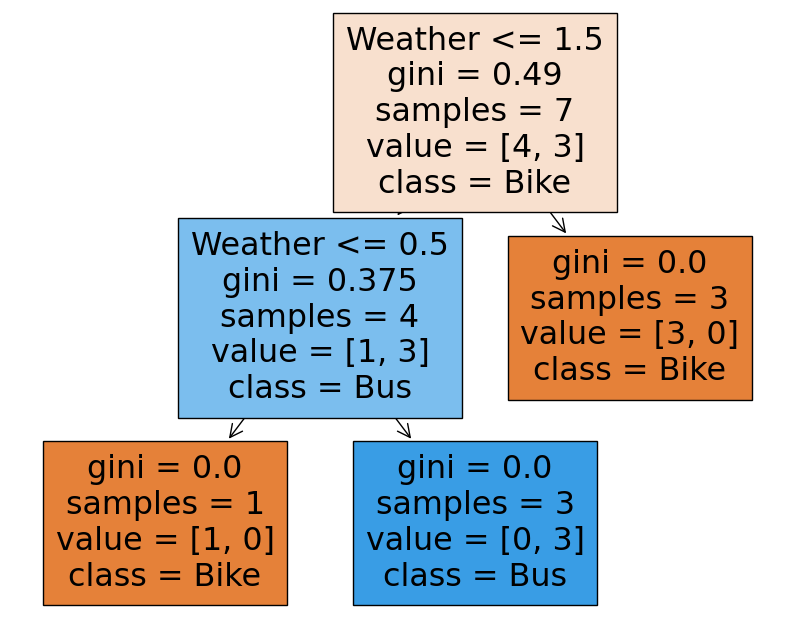

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(10,8))
plot_tree(modelo, feature_names=['Weather'], class_names=label_encoder_transport.classes_, filled=True)
plt.show()

# Cloudy= 0 Sunny = 2, Rainy = 1
# Bike = 0; Bus = 1

In [11]:
#  Valores para probar (asegúrate de que sean 2D)
#  Sunny, Sunny y Rainy
X_test = np.array([1,1,0]).reshape(-1, 1)

# Hacer predicciones con los nuevos valores
y_pred = modelo.predict(X_test)

# Mostrar las predicciones
print(y_pred)

# Cloudy= 0 Sunny = 2, Rainy = 1
# Bike = 0; Bus = 1

[1 1 0]


In [12]:
from sklearn.metrics import accuracy_score

# Evaluar el modelo
y_test = np.array([1,1,0]).reshape(-1, 1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
